In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

In [19]:

df_train = pd.read_csv('../data/train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [39]:
df_test = pd.read_csv('../data/test.csv')
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
df_submission = pd.read_csv('../data/sample_submission.csv')
df_submission.head(10)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [95]:
# Echo un vistazo las columnas:

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

1. El problema
Hay que estudiar el significado y la relevancia de cada variable con respecto al problema. 

La relevancia de la variable en la compra de una casa.
La importancia de la variable.
Solapamiento con otras variables.
En la competición de Kaggle 'House prices' se indica que el problema es la predicción del precio de las viviendas, por lo que la variable objetivo es 'SalePrice'. Las demás variables se describen de la siguiente manera:

-MSSubClass: clase de construcción
-MSZoning: clasificación de la zona
-LotFrontage: pies lineales de calle de la parcela
-LotArea: tamaño de la parcela en pies cuadrados
-Street: tipo de acceso por carretera
-Alley: tipo de acceso al callejón
-LotShape: forma de la parcela
-LandContour: planitud de la parcela
-Utilities: servicios públicos disponibles
-LotConfig: Configuración de parcela
-LandSlope: pendiente de la parcela
-Neighborhood: ubicación física dentro de los límites de la ciudad de Ames
-Condition1: proximidad a la carretera principal o al ferrocarril
-Condition2: proximidad a la carretera principal o al ferrocarril (si hay un segundo)
-BldgType: tipo de vivienda
-HouseStyle: estilo de vivienda
-OverallQual: calidad general del material y del acabado
-OverallCond: condición general
-YearBuilt: fecha original de construcción
-YearRemodAdd: fecha de remodelación
-RoofStyle: tipo de cubierta
-RoofMatl: material del techo
-Exterior1st: revestimiento exterior de la casa
-Exterior2nd: revestimiento exterior de la casa (si hay más de un material)
-MasVnrType: tipo de revestimiento de mampostería
-MasVnrArea: área de revestimiento de mamposte en pies cuadrados.
-ExterCond: estado del material en el exterior
-Foundation: tipo de cimentación
-BsmtQual: altura del sótano
-BsmtCond: estado general del sótano
-BsmtExposure: paredes del sótano a nivel de calle o de jardín
-BsmtFinType1: calidad del área acabada del sótano
-BsmtFinSF1: pies cuadrados de la superficie acabada tipo 1
-BsmtFinType2: calidad de la segunda superficie acabada (si existe)
-BsmtFinSF2: Pies cuadrados de la superficie acabada tipo 2
-BsmtUnfSF: pies cuadrados del área sin terminar del sótano
-TotalBsmtSF: pies cuadrados totales del sótano
-Heating: tipo de calefacción
-HeatingQC: calidad y estado de la calefacción
-CentralAir: aire acondicionado central
-Electrical: sistema eléctrico
-1erFlrSF: área en pies cuadrados de la primera planta (o planta baja)
-2ndFlrSF: área en pies cuadrados de la segunda planta
-LowQualFinSF: pies cuadrados acabados de baja calidad (todos los pisos)
-GrLivArea: superficie habitable por encima del nivel del suelo en pies cuadrados
-BsmtFullBath: cuartos de baño completos en el sótano
-BsmtHalfBath: medio baño del sótano
-FullBath: baños completos sobre el nivel del suelo
-HalfBath: medios baños sobre el nivel del suelo
-Bedroom: número de dormitorios por encima del nivel del sótano
-Kitchen: número de cocinas
-KitchenQual: calidad de la cocina
-TotRmsAbvGrd: total de habitaciones por encima del nivel del suelo (no incluye baños)
-Functional: valoración de la funcionalidad de la vivienda
-Fireplaces: número de chimeneas
-FireplaceQu: calidad de la chimenea
-GarageType: ubicación del garaje
-GarageYrBlt: año de construcción del garaje
-GarageFinish: acabado interior del garaje
-GarageCars: tamaño del garaje en capacidad de coches
-GarageArea: tamaño del garaje en pies cuadrados
-GarageQual: calidad de garaje
-GarageCond: condición de garaje
-PavedDrive: calzada asfaltada
-WoodDeckSF: area de plataforma de madera en pies cuadrados
-OpenPorchSF: área de porche abierto en pies cuadrados
-EnclosedPorch: área de porche cerrada en pies cuadrados
-3SsnPorch: área de porche de tres estaciones en pies cuadrados
-ScreenPorch: superficie acristalada del porche en pies cuadrados
-PoolArea: área de la piscina en pies cuadrados
-PoolQC: calidad de la piscina
-Fence: calidad de la valla
-MiscFeature: característica miscelánea no cubierta en otras categorías
-MiscVal: valor en dólares de la característica miscelánea
-MoSold: mes de venta
-YrSold: año de venta
-SaleType: tipo de venta
-SaleCondition: Condiciones de venta


2. Análisis univariable: SalePrice
La variable 'SalePrice' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable.

In [96]:
# Resumen de estadística descriptiva:

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df_test['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [6]:
df_submission['SalePrice'].describe()

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


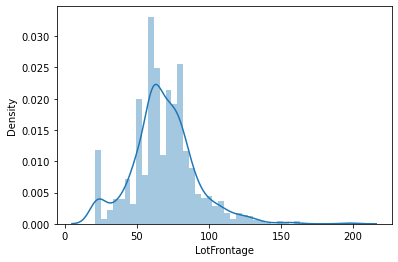

In [7]:

sns.distplot(df_test['LotFrontage']);

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


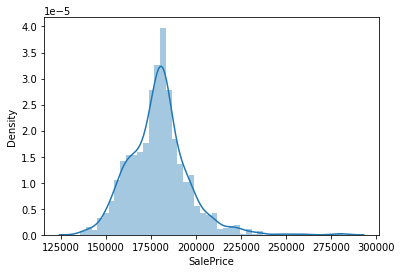

In [8]:
sns.distplot(df_submission['SalePrice']);

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


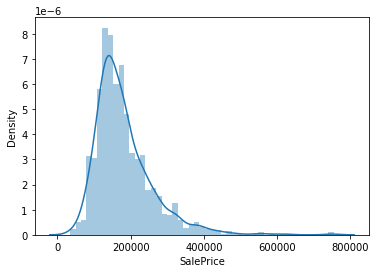

In [97]:
# Histograma:

sns.distplot(df_train['SalePrice']);

A simple vista se pueden apreciar:

Una desviación con respecto a la distribución normal.
Una asimetría positiva.
Algunos picos.

In [98]:
# Asimetría y curtosis:

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#Relación con variables numéricas

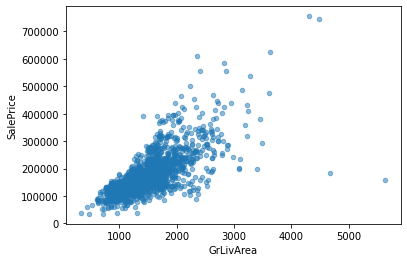

In [99]:
# Diagrama de dispersión grlivarea/saleprice:

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

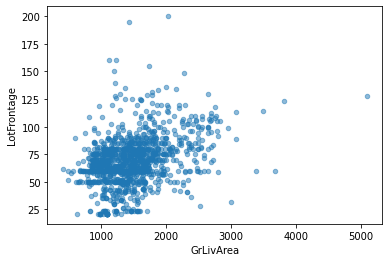

In [10]:

var = 'GrLivArea'
data = pd.concat([df_test['LotFrontage'], df_test[var]], axis=1)
data.plot.scatter(x=var, y='LotFrontage', alpha = 0.5);

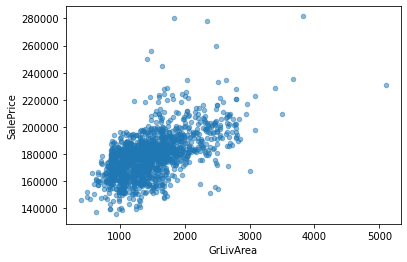

In [11]:
var = 'GrLivArea'
data = pd.concat([df_submission['SalePrice'], df_test[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

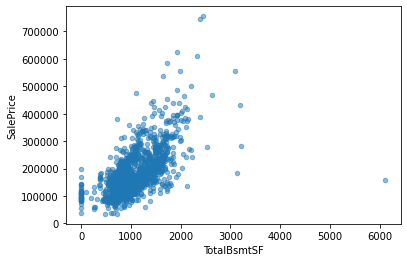

In [100]:
# Diagrama de dispersión totalbsmtsf/saleprice:

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

In [ ]:
Preguntas de exploración

¿Cuál es la asimetría de la variable saleprice?

¿Cuál es la correlación de las variables del datframe train?

¿Cuál es la correlación de las variables del datframe train SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt



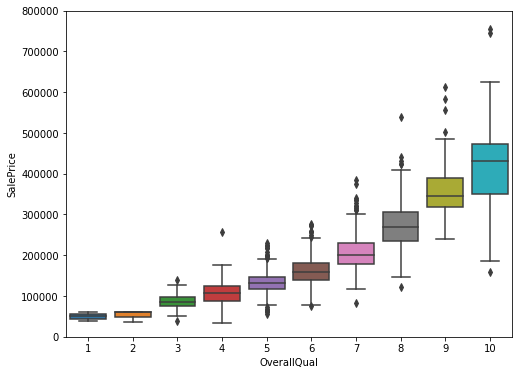

In [101]:
# Diagrama de cajas overallqual/saleprice:

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

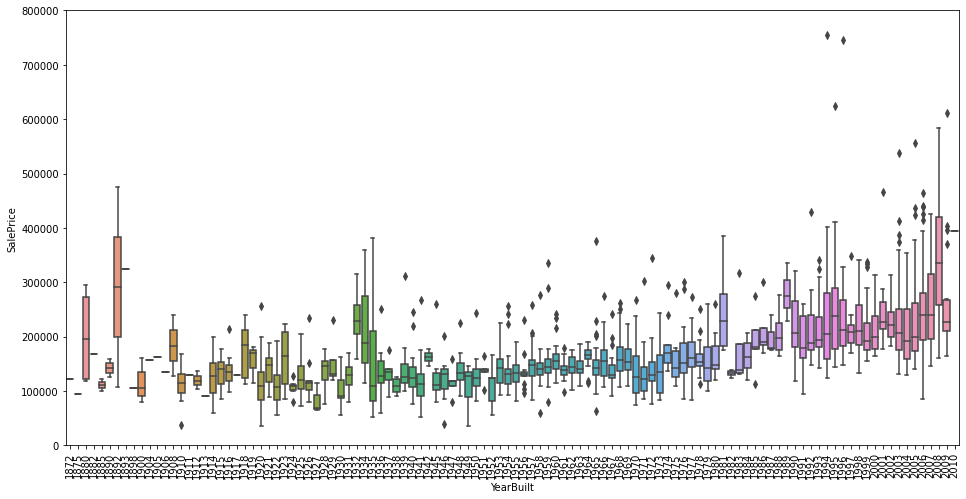

In [102]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Resumiendo:
'GrLivArea' y 'TotalBsmtSF' mantienen una relación lineal positiva con 'SalePrice', aumentando en el mismo sentido. En el caso de 'TotalBsmtSF', la pendiente de esta relación es muy acentuada.
'OverallQual' y 'YearBuilt' también parecen relacionadas con 'SalePrice' (más fuerte en el primer caso), tal y como se puede observar en los diagramas de cajas.
Sólo se ha explorado cuatro variables, pero hay muchas otras a analizar.

3. Análisis multivariable
Hasta ahora sólo me he dejado llevar por la intuición para el análisis de las variables que he creído importantes. Es hora de un análisis más objetivo.

Para ello voy a realizar las siguientes pruebas de correlación:

Matriz de correlación general.
Matriz de correlación centrada en la variable 'SalePrice'.
Diagramas de dispersión entre las variables más correladas.

Matriz de correlación (en forma de mapa de calor)

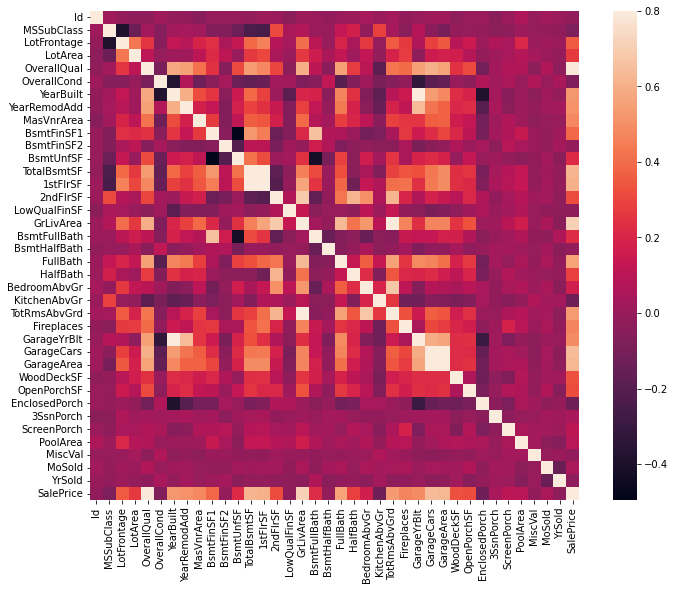

In [103]:
# Matriz de correlación:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: 'TotalBsmtSF' y '1stFlrSF', seguidas por las variables 'GarageX'. En ambos casos parece haber una correlación significativa; en realidad es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

Con respecto a las correlaciones de la variable 'SalePrice', destacan las vistas anteriormente ('GrLivArea', 'TotalBsmtSF' y 'OverallQual'), pero hay otras que también deberían ser tenidas en cuenta.

Matriz de correlación de 'SalePrice'

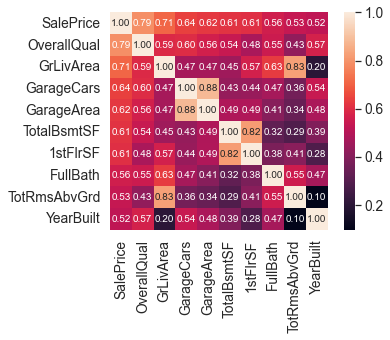

In [104]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [105]:
corr = df_train.corr()
corr[['SalePrice']].sort_values(by = 'SalePrice',ascending = False).style.background_gradient()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


En estas matrices de correlación se puede observar:

'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están fuertemente correladas con 'SalePrice'.
'GarageCars' y 'GarageArea' también están fuertemente correladas pero, como he comentado anteriormente, el número de coches que se pueden aparcar en un garaje es una consecuencia de su superficie. Es por esto que sólo voy a mantener una de estas variables en el análisis, 'GarageCars', ya que está más correlada con 'SalePrice'.
'TotalBsmtSF' y '1stFloor' plantean la misma situación. En este caso mantendré 'TotalBsmtSF'.
'FullBath' también está correlada con 'SalePrice'. Parece que a la gente le gusta darse un baño en casa...
'TotRmsAbvGrd' y 'GrLivArea', otro caso de multicolinealidad.
'YearBuilt' también está ligeramente correlada con 'SalePrice'.

Diagramas de dispersión entre 'SalePrice' y sus variables correladas

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


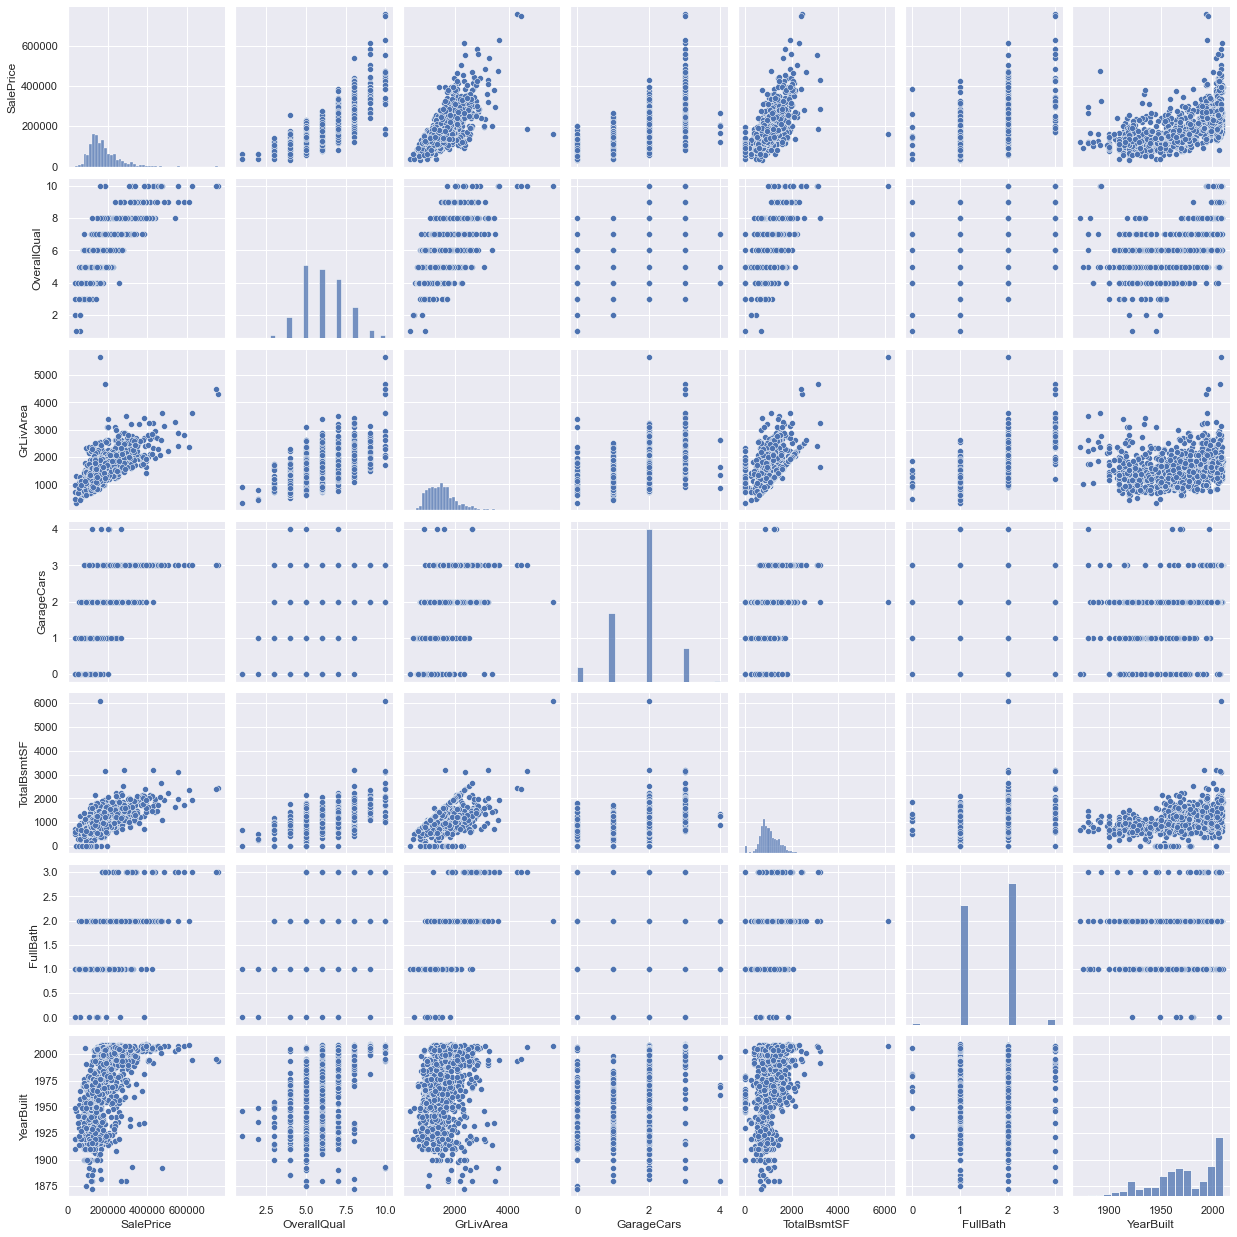

In [106]:
# Scatter plot:

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

4. Limpieza de datos¶
Datos desaparecidos
Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.

In [107]:
# Missing data:

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Por razones prácticas voy a eliminar las variables con más de un 15% de datos faltantes (p.ej. 'PoolQC', 'MiscFeature', 'Alley', etc.); no creo que las echemos de menos, no parecen aspectos importantes a considerar al comprar una casa.

Con respecto a las variables 'GarageX', observo el mismo número de datos desaparecidos, hecho que quizás habría que estudiar con más detenimiento. Pero, dado que la información más relevante en cuanto al garaje ya está recogida por la variable 'GarageCars', y que sólo se trata de un 5% de datos faltantes, borraré las citadas variables 'GarageX', además de las 'BsmtX' bajo la misma lógica.

En cuanto a las variables 'MasVnrArea' y 'MasVnrType', se puede decir que no son esenciales y que, incluso, tienen una fuerte correlación con 'YearBuilt' y 'OverallQual'. No parece que se vaya a perder mucha información si elimino 'MasVnrArea' and 'MasVnrType'.

Para finalizar, encuentro un dato faltante en la variable 'Electrical'. Ya que sólo se trata de una observación, voy a borrarla y a mantener la variable.

En resumen, voy a borrar todas las variables con datos desaparecidos, excepto la variable 'Electrical'; en este caso sólo voy a borrar la observación con el dato faltante.

In [108]:
# Tratamiento de datos faltantes:

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() # Para comprobar que no hay más datos desaparecidos.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8844\2930537537.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

Datos atípicos:
Los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento es un asunto complejo que requiere más atención; por ahora sólo voy a hacer un análisis rápido a través de la desviación estándar de la variable 'SalePrice' y a realizar un par de diagramas de dispersión.

Análisis univariable: 
La primera tarea en este caso es establecer un umbral que defina una observación como valor atípico. Para ello voy a estandarizar los datos, es decir, transformar los valores datos para que tengan una media de 0 y una desviación estándar de 1.

In [109]:
# Estandarización de datos:

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8844\4075321022.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);


Fuera de la distribución (por debajo):
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Fuera de la distribución (por arriba):
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Los valores bajos son similares y no muy alejados del 0.
Los valores altos están muy alejados del 0. Los valores superiores a 7 están realmente fuera de rango.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


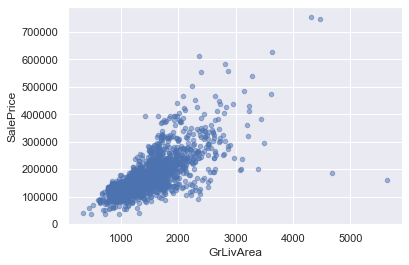

In [110]:
# Análisis bivariable SalePrice/GrLivArea:

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

Este diagrama de dispersión muestra un par de cosas interesantes:

Los dos valores más altos de la variable 'GrLivArea' resultan extraños. Sólo puedo especular, pero podría tratarse de terrenos agrícolas o muy degradados, algo que explicaría su bajo precio. Lo que está claro es que estos dos puntos son atípicos, por lo que voy a proceder a eliminarlos.
Las dos observaciones más altas de la variable 'SalePrice' se corresponden con las que observamos en el análisis univariable anterior. Son casos especiales, pero parece que siguen la tendencia general, por lo que voy a mantenerlas.

In [111]:
# Eliminación de valores:

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


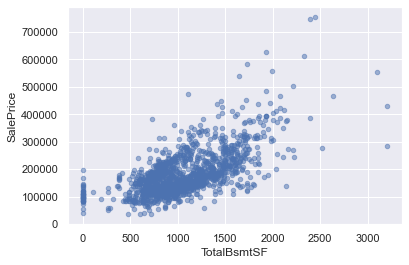

In [112]:
# Análisis bivariable SalePrice/TotalBsmtSF:

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

Aunque se pueden observar algunos valores bastante extremos (p.ej. TotalBsmtSF > 3000), parece que conservan la tendencia, por lo que voy a mantenerlo

5. Comprobación de normalidad: 
Ya he realizado cierta limpieza de datos y estudiado la variable 'SalePrice'. Ahora voy a comprobar si 'SalePrice' cumple las asunciones estadísticas que nos permiten aplicar las técnicas del análisis multivariable.


Normalidad - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'SalePrice', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

Homocedasticidad - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras, según (Hair et al., 2013). La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

Linealidad- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, no voy a entrar en esto porque la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.

Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Tampoco voy a tocar este asunto.

En búsqueda de la normalidad
El objetivo es estudiar la variable 'SalePrice' de forma fácil, comprobando:

Histograma - Curtosis y asimetría.
Gráfica de probabilidad normal - La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


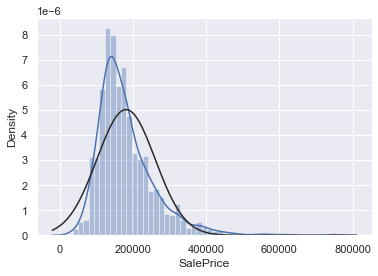

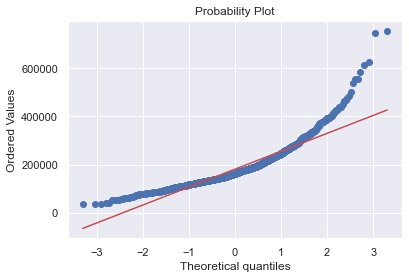

In [113]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

De estos gráficos se desprende que 'SalePrice' no conforma una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.

In [114]:
# Transformación de los datos:

df_train['SalePrice'] = np.log(df_train['SalePrice'])

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


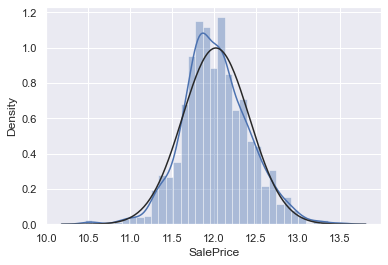

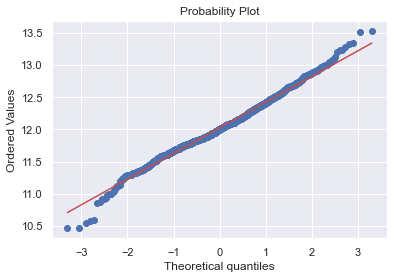

In [115]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


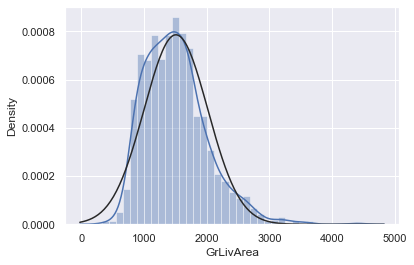

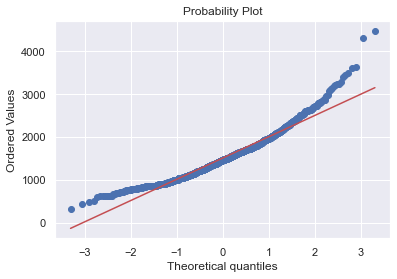

In [116]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [117]:
# Transformación de datos:

df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


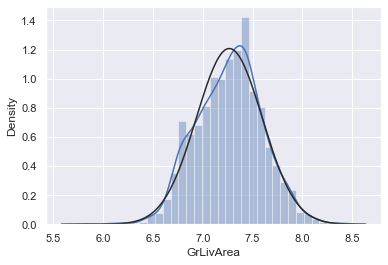

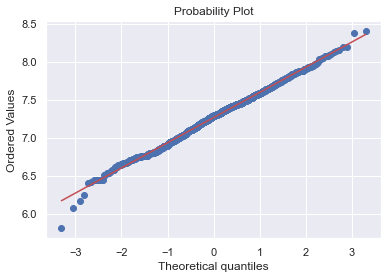

In [118]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


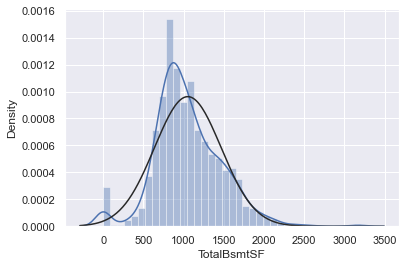

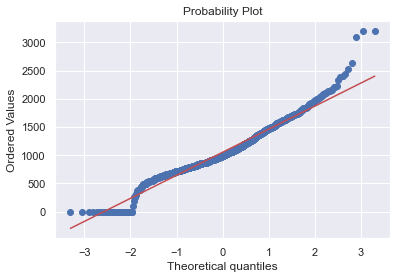

In [119]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

Estos gráficos nos muestran que la variable 'TotalBsmtSF':

Presenta asimetrías.
Hay un número significativo de observaciones con valor cero (casas sin sótano).
El valor cero no nos permite hacer transformaciones logarítmicas.
Para aplicar una transformación logarítmica, crearé una variable binaria (tener o no tener sótano). Después, aplicaré la transformación logarítmica a todas las observaciones que no sean cero, ignorando aquellas con valor cero. De esta manera podré transformar los datos, sin perder el efecto de tener o no sótano.

In [120]:
# Creación de la columna para una nueva variable categórica binaria (1 si area>0, 0 si area==0):

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [121]:
# Transformación de datos:

df_train.loc[df_train['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


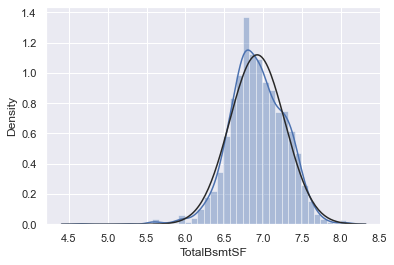

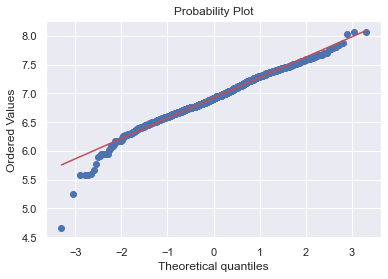

In [122]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

En búsqueda de la homocedasticidad¶
El mejor método para probar la homocedasticidad para dos variables métricas es de forma gráfica. Las desviaciones de una dispersión uniforme se muestran mediante formas tales como conos (pequeña dispersión a un lado del gráfico, gran dispersión en el lado opuesto) o diamantes (un gran número de puntos en el centro de la distribución).

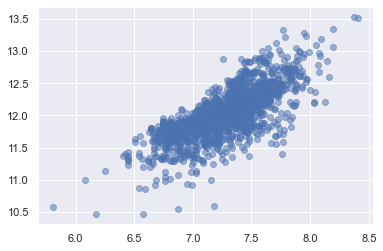

In [123]:
# Gráfico de dispersión:

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'], alpha = 0.5);

Las anteriores versiones de este gráfico de dispersión (antes de las transformaciones logarítmicas), tenían una forma cónica. Como puede apreciarse, el gráfico actual ya no tiene una forma cónica. Tan solo asegurando la normalidad en algunas variables, hemos resuelto el problema de la homocedasticidad.

Ahora vamos a comprobar 'SalePrice' con 'TotalBsmtSF'.

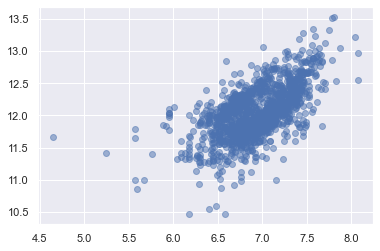

In [124]:
# Gráfico de dispersión:

plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'], alpha = 0.5);

Podemos decir que, en general, la variable 'SalePrice' muestra niveles equivalentes de varianza en todo el rango de 'TotalBsmtSF'.

Variables dummy

In [125]:
# Convertir las variables categóricas en variables ficticias o dummies:

df_train = pd.get_dummies(df_train)

Analisis Exploratorio de Datos
EDA, por sus siglas en inglés, es el proceso de limpieza y descubrimiento de insights a través de la revisión detallada de un conjunto de datos.

Pasos de preparación
Seleccionar las variables a analizar (que sean relevantes para el estudio)
Verificar la integridad de las variables (si están limpias o qué debemos hacer para limpiarlas o si no se pueden usar)
Plantearse preguntas de exploración
Plantear hipotesis a partir de nuestras variables*
Pasos de EDA
Limpiar los datos (80% del tiempo)
Responder las preguntas de exploración a partir de los datos (indicadores y gráficas)
Responder las hipótesis (Tests estadísticos | estadística descriptiva)*
Generar un reporte de resultados para el público en general
*Pasos opcionales dependiendo de la experiencia en el area de analisis

In [15]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_train)

In [23]:
profile = ProfileReport(df_train, title='Pandas Profiling Report', minimal=True)
profile.to_file('../data/train.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.92it/s]


In [20]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [22]:
df_train.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [23]:
df_train.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

In [24]:
df_train.LotArea.value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [25]:
df_train.LotFrontage.value_counts(normalize=True)

60.0     0.119067
70.0     0.058285
80.0     0.057452
50.0     0.047460
75.0     0.044130
           ...   
137.0    0.000833
141.0    0.000833
38.0     0.000833
140.0    0.000833
46.0     0.000833
Name: LotFrontage, Length: 110, dtype: float64

In [26]:
df_train.SalePrice.value_counts(normalize=True)

140000    0.013699
135000    0.011644
155000    0.009589
145000    0.009589
190000    0.008904
            ...   
202665    0.000685
164900    0.000685
208300    0.000685
181500    0.000685
147500    0.000685
Name: SalePrice, Length: 663, dtype: float64

In [27]:
df_train.LotArea.value_counts(normalize=True)

7200     0.017123
9600     0.016438
6000     0.011644
9000     0.009589
8400     0.009589
           ...   
14601    0.000685
13682    0.000685
4058     0.000685
17104    0.000685
9717     0.000685
Name: LotArea, Length: 1073, dtype: float64

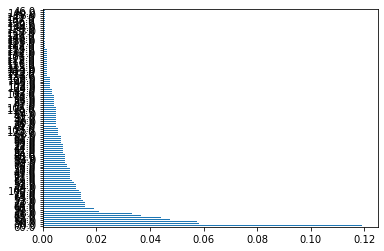

In [28]:
df_train.LotFrontage.value_counts(normalize=True).plot.barh()
plt.show()

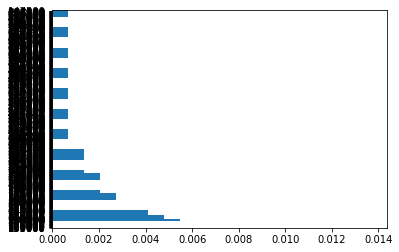

In [29]:
df_train.SalePrice.value_counts(normalize=True).plot.barh()
plt.show()

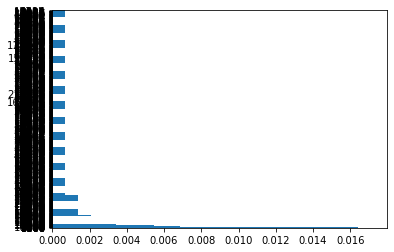

In [30]:
df_train.LotArea.value_counts(normalize=True).plot.barh()
plt.show()

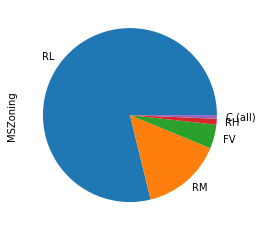

In [31]:
df_train.MSZoning.value_counts(normalize=True).plot.pie()
plt.show()

In [32]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\USUARIO\Documents\pythonProyecto\analyticsenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

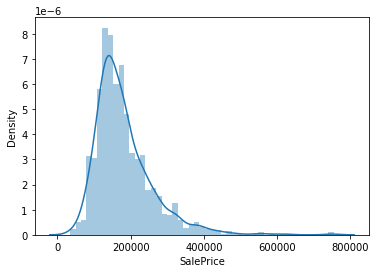

In [33]:
sns.distplot(df_train['SalePrice'])

(0.0, 3000.0)

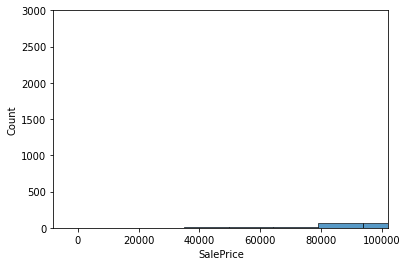

In [35]:
sns.histplot(df_train['SalePrice'])
plt.xlim(-8019, 102127)
plt.ylim(0,3000)

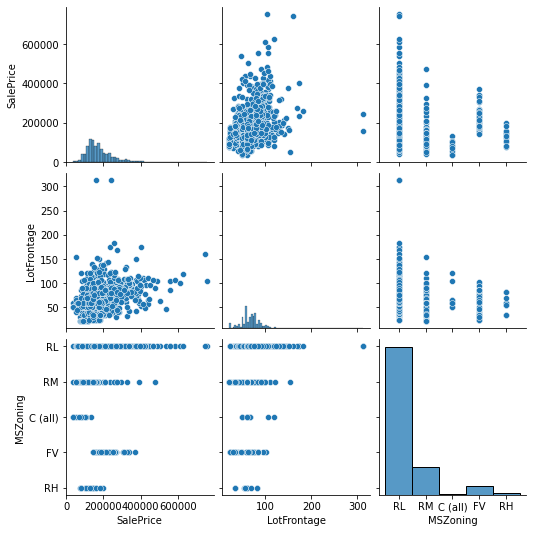

In [46]:
sns.pairplot(data = df_train, vars=['SalePrice','LotFrontage','MSZoning'])
plt.show()

In [54]:
df_train[['SalePrice','LotFrontage','MSZoning']].corr()

,SalePrice,LotFrontage
SalePrice,1.000000,0.351799
LotFrontage,0.351799,1.000000


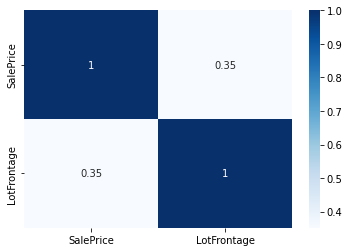

In [55]:
sns.heatmap(df_train[['SalePrice','LotFrontage','MSZoning']].corr(), annot=True, cmap = 'Blues')
plt.show()

Ahora como antes vamos a imprimir una mapa de calor.

Analisis multivariado

In [61]:
result = pd.pivot_table(data=df_train, index='MSZoning', columns='MSSubClass',values='SalePrice')
result

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
MSZoning,,,,,,,,,,,,,,,
C (all),45652.000000,57950.000000,NaN,NaN,91044.000000,NaN,40000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133900.000000
FV,226289.538462,NaN,NaN,NaN,NaN,248558.600000,NaN,NaN,NaN,NaN,NaN,226140.000000,164749.318182,NaN,NaN
RH,102966.666667,79000.000000,NaN,76000.000000,159434.000000,NaN,124533.333333,NaN,NaN,NaN,144666.666667,157000.000000,NaN,NaN,180000.000000
RL,186467.039370,96481.212121,196500.0,110050.000000,156277.477273,239544.457875,199808.733333,184750.0,169736.551724,147810.0,132379.906977,210029.491525,164909.090909,NaN,134662.500000
RM,121327.500000,97983.969697,115750.0,112414.285714,124698.039216,135000.000000,138403.192308,197050.0,NaN,NaN,136300.000000,172920.952381,109876.666667,102300.0,112718.181818


Ahora como antes vamos a imprimir una mapa de calor.

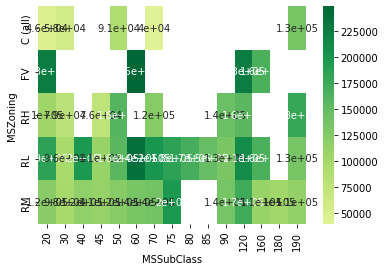

In [65]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Ejemplos de Test de Hipótesis Estadísticas
Esta guía es un resumen y adapación de 17 Statistical Hypothesis Tests in Python

Test de Normalidad Shapiro-Wilk
Permite determinar que tan probable que los datos sigan una distribución Normal (Gaussiana). El único supuesto necesario para aplicar este test es que las observaciones de la muestra de datos sean independientes e identicamente distribuidas (iid).

¿Cómo se interpretan los resultados de este test?
Se tienen dos hipotesis: La Hipótesis Nula (H0), que se intenta rechazar, y la Hipótesis Alternativa (H1), que se intenta comprobar.

H0: La muestra tiene una distribucion Normal. Se rechaza si  < 0.05

H1: La muestra NO tiene una distribucion Normal. Se rechaza si  > 0.05
Veamos la implementación desde python:

In [66]:
from scipy.stats import shapiro

In [67]:
sale = df_train['SalePrice'].dropna()
sale.shape

(1460,)

In [69]:
# N > 5000 el valor de p no es preciso, por ello seleccionemos 45000 observaciones aleatoriamente
sale= sale.sample(1000) 

In [70]:
stat, p = shapiro(sale)
print(f'stat={stat:.3f}, p={p:.3f}')

stat=0.850, p=0.000


In [71]:
if p > 0.05:
    	print('Se acepta la H0. La muestra tiene una distribucion Normal.')
else:
	print('Se rechaza la H0. La muestra NO tiene una distribucion Normal')

Se rechaza la H0. La muestra NO tiene una distribucion Normal


Chi-Squared Test
Este test te permite determinar si es probable que dos variables categóricas están relacionadas o son independientes entre sí. Para que este test sea válido se necesita cumplir con 2 supuestos. 1) Las observaciones utilizadas para calcular la tabla de contingencia son independientes y 2) Cada valor en la tabla de contingenia debe ser mayor a 25.

¿Qué es una tabla de contingencia?
Es una tabla de cruzada de frecuencia de dos observaciones categoricas. Como en el siguiente ejemplo:

Sexo / Flag_UCI	0	1	Total
M	54	32	86
F	68	34	102
Total	122	66	188

¿Cómo se interpretan los resultados de este test?

H0: Las dos muestras son independientes. Se rechaza si  < 0.05

H1: Existe dependencia entre las muestras. Se rechaza si  > 0.05

In [72]:
from scipy.stats import chi2_contingency

In [74]:
contingency_table = pd.crosstab(df_train['MSZoning'], df_train['SalePrice'])
contingency_table

SalePrice,34900,35311,37900,39300,40000,52000,52500,55000,55993,58500,...,485000,501837,538000,555000,556581,582933,611657,625000,745000,755000
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RL,0,0,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
RM,0,0,1,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f'stat={stat:.3f}, p={p:.3f}')

stat=3147.891, p=0.000


In [76]:
if p > 0.05:
    	print('Se acepta la H0. Las dos muestras son independientes.')
else:
	print('Se rechaza la H0. Existe dependencia entre las muestras.')

Se rechaza la H0. Existe dependencia entre las muestras.


Analisis de Varianza (ANOVA)
Este test te permite determinar si es probable que dos o mas grupos tienen la misma media poblacional. Los supuestos de este test son que las observaciones de cada muestra:

Son independientes y identicamente distribuidas (iid).
Siguen una distribución normal.
Tienen la misma varianza (homocedasticidad).
¿Cómo se interpretan los resultados de este test?

H0: Las medias poblacionales de los grupos son iguales. Se rechaza si  < 0.05

H1: Una o más de las medias poblacionales de los grupos son diferentes. Se rechaza si  > 0.05

Veamos la implementación desde python:

In [77]:
from scipy.stats import f_oneway

In [79]:
if p > 0.05:
    	print('Se acepta la H0. Las dos muestras son independientes.')
else:
	print('Se rechaza la H0. Existe dependencia entre las muestras.')

Se rechaza la H0. Existe dependencia entre las muestras.
